### 2.2 Question 2

Download the Iris dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/. The dataset can be downloaded from iris.data. Load the data into a pandas dataframe.
For this lab, we’re going to be performing a binary classification problem,
but this dataset has 3 classes: setosa, virginica, and versicolor. So we want
to take this multi-class problem and transform it into a binary classification.
Create a new column for the dataset called target. The value of target
will be 1 if the row contains a setosa flower, else the value is $0$. There should
be $\frac{1}{3}$ rows with the value of $1$, the rest should be $0$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Defining the fielpath
filepath = "/content/data/iris.data" 

def load_data(filepath):
    
    # This part reads the data and avoids to use the first row as the column name
    df = pd.read_csv(filepath, header = None)
    
    # After that the column names for the Dataset are assigned
    col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
    df.columns = col_names  
    
    # Then the column "tareget" is created and filled with ceros
    df['target']  = 0
    
    # Then the values in "target" column are modified depending if the Specie is or not a Setosa
    df.loc[df['Species'] == 'Iris-setosa', 'target'] = 1
    
    return df

# The previous function is called
iris  = load_data(filepath)
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


### 2.3 Question 3
For this question we want to take this dataset of 150 rows, and split it into
a train, test, and validation dataset, using the following proportions for each
split:

• Training: 70%

• Validation: 10%

• Testing: 20%

Sample data for each subset using stratified sampling. I.e. the training data should have roughly $\frac{1}{3}$
positive samples, the testing and validation dataset should also have roughly $\frac{1}{3}$ positive samples.


In [2]:
# This part is in charge of making the Data split for this, 
# it is identified that there are 3 types of species each with 50 samples.
# Which may or may not be of the Iris-setosa type.

iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

This column, although not the target column, will help us to generate a balanced data set where there is an equal number of individuals for each type of Iris species, which may or may not be classified as Iris-setosa.

In [3]:
def slipt_data(df, column):

   
   
    """
    Given that the data set is perfectly divided among 50 samples for each species, 
    35 random samples will be taken from

      "Iris-setosa"
      "Iris-versicolor"
      "Iris-virginica"

    Which will complete 70% of the training set data, 
    the same will be done with the validation set 10%, with 10 exp. per specie,
    and the testing set 20%, with 10 exp. per specie,.
    """
    # This identifies unique values of existing in the dataset for that column.
    values = list(df[column].unique())
    
    # 3 datasets are created for training, test and validation.
    training_set = pd.DataFrame()
    testing_set = pd.DataFrame()
    validation_set = pd.DataFrame()
    

    for value in values:
        
        data = df[df[column] == value] # Selects the specie
        train=data.sample(n = 35,random_state=42) # Choose the training samples
        test=data.drop(train.index) 
        validation = test.sample(n=5,random_state=42) # Choose the validation samples
        test=test.drop(validation.index) # Choose the test samples
        
        training_set = pd.concat([training_set, train])
        testing_set = pd.concat([testing_set, test])
        validation_set = pd.concat([validation_set, validation])

    return training_set, testing_set, validation_set  
   

In [4]:
training_set, testing_set, validation_set = slipt_data(iris, 'Species')

### 2.4 Question 4
Using the linear regression model you created in the previous lecture, transform it into a logistic regressor by applying the logistic function to the output
of the model. The loss function for this model should be binary cross entropy.

Select two columns from the Iris dataset (i.e. petal length and petal
width), and using these two columns, train a logistic regressor using gradient
descent, measuring the gradient using finite differences approximation. This
means that instead of having a single slope variable, we have multiple:

$$\hat{y} = \sigma\left (\beta_{0} + \sum_{i = 1}^{m}x_{i}\beta_{i}\right )$$


where $\hat{y}$ is the model’s probability prediction, $\sigma$ is the logistic/sigmoid
function, $\beta_{0}$ is the intercept, $\beta_{i}$
is the coefficient that modulates the $X_{i}$ variable.

I’ve made a start for you, please fill in the ’#TODOs’:

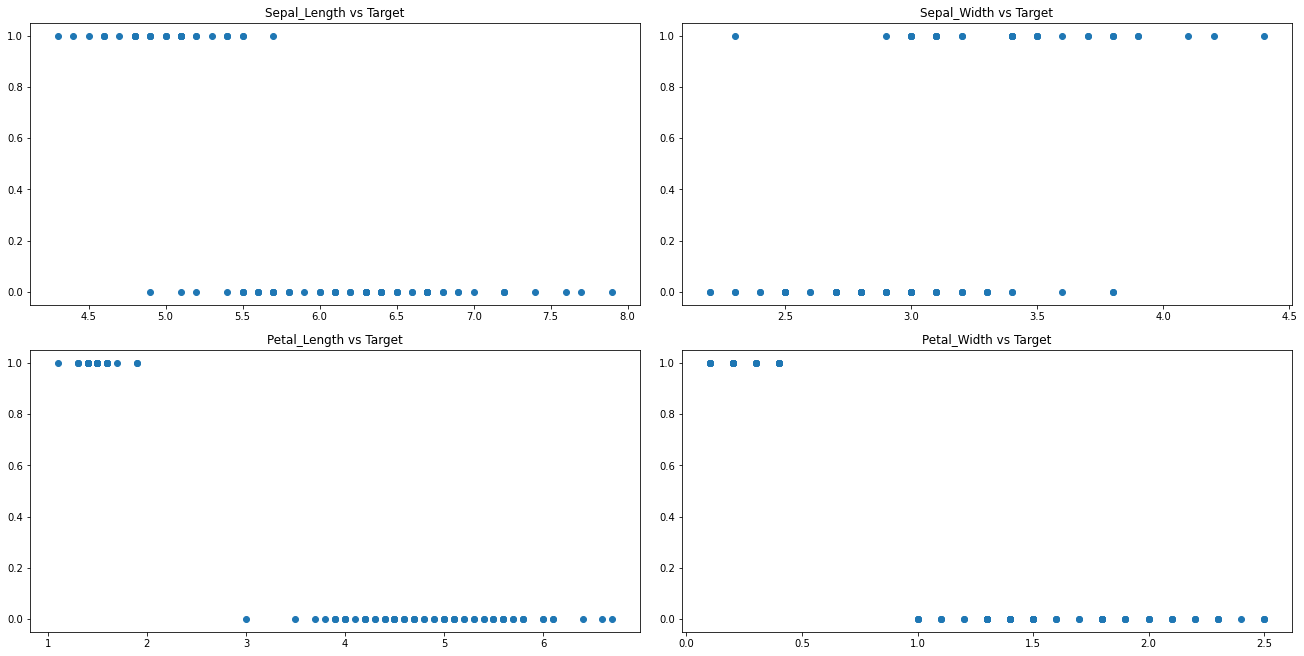

In [5]:
import matplotlib.pyplot as plt
varibles_to_plot = ["Sepal_Length",	"Sepal_Width",	"Petal_Length",	"Petal_Width"]

fig, axs = plt.subplots(2, 2, figsize=(18, 9), constrained_layout=True)
for ax, variable in zip(axs.flat, varibles_to_plot):
    ax.set_title("{0} vs {1}".format(variable, 'Target'))
    ax.scatter(training_set[variable], training_set['target'])


When verifying the data we can see that the "Petal_Length" and "Petal_Width" are variables that allow us to clearly separate respect to the target using a logistic regression, therefore these 2 will be taken as regressor variables of our model.

In [6]:
# Training sets containing only the selected regressor variables are generated.
train_x = training_set[["Petal_Length", "Petal_Width"]]
train_y = training_set['target']

test_x = testing_set[["Petal_Length", "Petal_Width"]]
test_y = testing_set['target']

valid_x = validation_set[["Petal_Length", "Petal_Width"]]
valid_y = validation_set['target']

We know that the best error function for a binary regression, is the bbinary cross entropy, defined as:

$$L = -\frac{1}{n}\sum_i^n y_i \log(\hat{y_i}) + (1-y_i) \log(1-\hat{y_i})$$

Where the finite difference gradient of this function is defined by:

$$\frac{\partial L}{\partial \beta_i} = \frac{L(x,y;\beta_i + \epsilon, \beta) - L(x,y;\beta_i, \beta)}{\beta_i + \epsilon - \beta_i} =
\frac{L(x,y;\beta_i + \epsilon, \beta) - L(x,y;\beta_i, \beta)}{\epsilon} 
$$

In [7]:
from IPython.terminal.ipapp import shell_flags
def bce(y, yhat):

    y =  np.array(y)
    yhat = np.array(yhat)

    # TODO: apply the binary cross entropy function returning the loss
    negative_side = (1-y)* np.log(1-yhat)
    positive_side = (y)* np.log(yhat)
    N = len(y)
    bce = (-1/N)* np.sum(positive_side + negative_side)
    return bce


class LogisticRegressor:
    
    def __init__(self, n_features: int = 2):

        self.params = np.random.randn(n_features + 1)
    
    def lm(self, x):

        """Linear regresor"""

        h = self.params[0] + self.params[1:] @ x.T
        return h


    def logistic(self, h):

        """Logistic regresor"""

        # TODO: apply the logistic function
        z = 1 / (1 + np.exp(-h))
        return z

    def gradient_decent(self, x, y, epsilon = 1e-4):

        # The gradient of the variables to be analyzed is calculated.
        # an epsilon matrix is generated, which gives the differences
        # in each row a value Bn+epsilon,
        # while the other parameters are kept constant.

        n = len(self.params)
        epsilon_matrix = np.diag(np.zeros(n) + np.array(epsilon))
        params_matrix = np.full((n,n),self.params) + epsilon_matrix
        
        # A vector of gradients of the size of the number of parameters is generated.
        gradient = np.zeros(n)

        # The gradient is calculated for each row of the epsilon matrix 
        # and stored in the gradient vector.

        for i in range(n):
          
          # Model prediction is performed using the Bn+epsilon values.
          params = params_matrix[i,:]
          h_e = params[0] + params[1:] @ x.T
          z_e = self.logistic(h_e)

          # The prediction is performed using the current values.
          z = self.logistic(self.lm(x))

          gradient[i] = (bce(y, z_e) - bce(y, z)) / epsilon

        return gradient


    def fit(self, train_x, train_y, valid_x, valid_y, epochs: int = 1000, lr: float = 0.01):
        
        """ Adjusts the model parameters to obtain the result that contains 
        the minumum error."""
        
        # TODO: train the model using gradient descent and finite-differences

        training_loss   = []
        validation_loss = []

        for epoch in range(epochs):
          
          # The gradient calculation function is called
          gradient = self.gradient_decent(train_x, train_y, epsilon = 1e-4)

          # Regression is performed
          z = self.logistic(self.lm(train_x))
          z_validation = self.logistic(self.lm(valid_x))

          # Parameters are updated
          self.params -= (lr * gradient)


          # The error is calculated
          training_loss.append(bce(train_y, z))
          validation_loss.append(bce(valid_y, z_validation)) 

        return training_loss, validation_loss
    

    def predict(self, x, threshold = 0.5):

        """
        The model is predicted based on the values of the regressor variables.
        and to the established threshold
        """

        self.probabiity= self.logistic(self.lm(x))

        yhat = [1 if i >= threshold else 0 for i in self.probabiity]

        return yhat

        
  


### 2.5 Question 5
As gradient descent is iterating, store (using class variables), the training and validation loss.

Visualise the training and validation loss. Is there a point at which the model begins to over fit? How do you know that the model is beginning to overfit by looking at these curves?

In [8]:
# An object using the LogisticRegressor class is generated. 
lr = LogisticRegressor()

In [9]:
# The model is adjusted
training_loss, validation_loss = lr.fit(train_x, train_y, valid_x, valid_y)

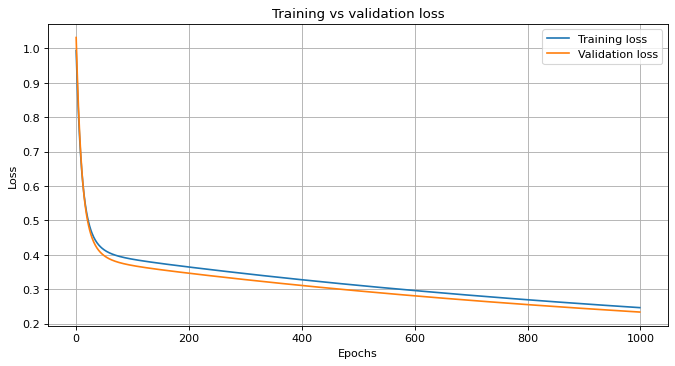

In [10]:
# The model training and validation loss are plotted.
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title("Training vs validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training loss','Validation loss'])
plt.grid()
plt.show()

In [11]:
# A variable containing the predicted values is generated.
yhat = lr.predict(test_x)
yhat

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

### 2.6 Question 6
Predict the class labels for the testing set.
For the testing set, calculate the:

• TP – number of true positives

• TN – number of true negatives

• FP – number of false positives

• FN – number of false negatives

In [12]:
def confusion_matrix(y, yhat):
    
    """
    This function returns the elements of a two-dimensional confusion matrix 
    calculated by counting the true values resulting of using logical operators such that:

        TP = Logical AND
        TN = Logical NOR
        FP = Logical A'B
        FN = Logical AB'

    """
    
    # Logical AND Gate
    TP = np.sum(np.logical_and(y, yhat))
    
    # Logical NOR Gate
    TN = np.sum(np.logical_and(np.logical_not(y),np.logical_not(yhat)))
    
    # Logical A'B Gate
    FP = np.sum(np.logical_and(np.logical_not(y),yhat))
    
    # Logical AB' Gate
    FN = np.sum(np.logical_and(y,np.logical_not(yhat)))
    
    return TP, TN, FP, FN

In [13]:
# A variable containing the actual values of the test set is generated.
y =  test_y

# The function that generates the confusion matrix is called 
TP, TN, FP, FN = confusion_matrix(y, yhat)

print("TP "+str(TP) + ",TN "+ str(TN) + ",FP "+ str(FP) + ",FN "+ str(FN) )

TP 10,TN 20,FP 0,FN 0


### 2.7 Question 7
Calculate the precision and recall and F1 score.


$$Precission = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$

$$F_{\beta} = (1 + \beta^{2})\frac{Precission * Recall}{(\beta^{2}* Precision) + Recall)}$$

Calling the above function and making use of the previous equations we have that the metrics of the confusion matrix are given by:

In [14]:

def precision(y, yhat):
    # calculate the precision and return it
    TP, TN, FP, FN = confusion_matrix(y, yhat)  
    pr = TP / (TP + FP)
    
    return pr

def recall(y, yhat):
    # calculate the recall and return it
    TP, TN, FP, FN = confusion_matrix(y, yhat)
    rc = TP / (TP + FN)
    
    return rc

def f_beta(y, yhat, beta=1):
    
    pr = precision(y, yhat)
    rc = recall(y, yhat)
    
    # calculate the f_beta score and return it
    fb = (1 + beta**2) * ((pr * rc) / ((beta**2 * pr) + rc))
    
    return fb


### 2.8 Question 8
Generate a report using the precision, recall and F1 and confusion matrix.
The report should be printed like:

In [15]:

def print_report(y,yhat):
  """This function generates a confusion matrix,
     each line of the matrix is a string of characters that when summed 
     and printed generates the result based on the values of y and yhat.
  """
  
  TP, TN, FP, FN = confusion_matrix(y, yhat)

  pr = np.round(precision(y, yhat),1)
  rc = np.round(recall(y, yhat),1)
  f1 = np.round(f_beta(y, yhat),1)

  row_1 = "|" + " " * 8 + "|" + " " * 10 + "| Predicted |" + " " *10 + "|\n"
  row_2 = "|" + " " * 8 + "|" + " " * 10 + "|  Positive |" + " Negative |\n"
  row_3 = "| Actual |" + " Positive |" + " " * (10 - len(str(TP))) + str(TP) + " |" + " " * (9 - len(str(FN))) + str(FN) + " |\n"
  row_4 = "|" + " " * 8 + "|" + " Negative |" + " " * (10 - len(str(FP))) + str(FP) + " |" + " " * (9 - len(str(TN))) + str(TN) + " |\n\n"
  row_5 = "- Precision: {0} \n".format(pr)
  row_6 = "- Recall: {0} \n".format(rc)
  row_7 = "- F_1 Score: {0} \n".format(f1)

  conf_matrix = (row_1+row_2+row_3+row_4+row_5+row_6+row_7)

  print(conf_matrix)



In [16]:
print_report(y,yhat)

|        |          | Predicted |          |
|        |          |  Positive | Negative |
| Actual | Positive |        10 |        0 |
|        | Negative |         0 |       20 |

- Precision: 1.0 
- Recall: 1.0 
- F_1 Score: 1.0 



### 2.9 Question 9
Calculate the true-positive and false positive rate, and from these values
generate a ROC curve.


$$FPR = \frac{FP}{FP + TN}$$

$$TPR = \frac{TP}{TP + TN}$$

In [17]:
def roc(y, lr, x ,threshold_step=0.01):
# iteratively increase the threshold by threshold_step,
# calculating the TP and FP rate for each iteration. This function
# should return two lists, a list of TP rates, and a list of FP
# rates.
    steps = np.arange(0,1,threshold_step)
    
    TP_rate = []
    FP_rate = []

    for step in steps:

      pred = lr.predict(x, step)
      TP, TN, FP, FN = confusion_matrix(y, pred)

      TP_rate.append(TP / (TP + FN))
      FP_rate.append(FP / (FP + TN))


    return FP_rate, TP_rate

FP_rate, TP_rate = roc(test_y, lr, test_x)

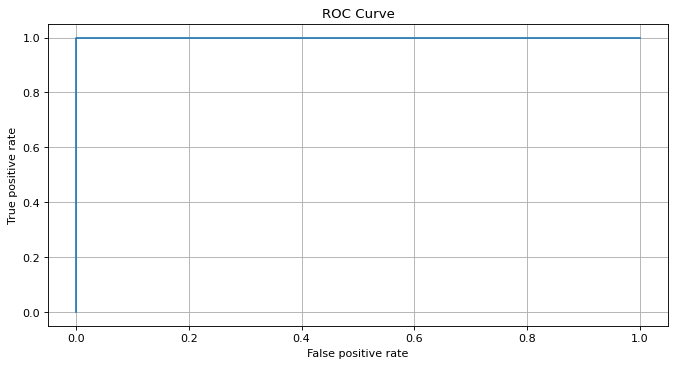

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=80)
plt.plot(FP_rate, TP_rate)

plt.title("ROC Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.grid()
plt.show()

### 2.10 Question 10
Now that you’ve created a logistic classifier for two features of the Iris dataset
and have created some analytic results. Select another two columns (i.e.
petal width and sepal length, or petal length and sepal width). Create
a different logistic classifier using these new columns and create the same
results as you did with questions 8 and 9.
Compare these two models trained with different columns. Which model
is best, and why do we know that it’s the best?


As seen in the first section "Sepal_Length", "Sepal_Width", are the least separable variables for a logistic model and therefore will be used to train a new model.

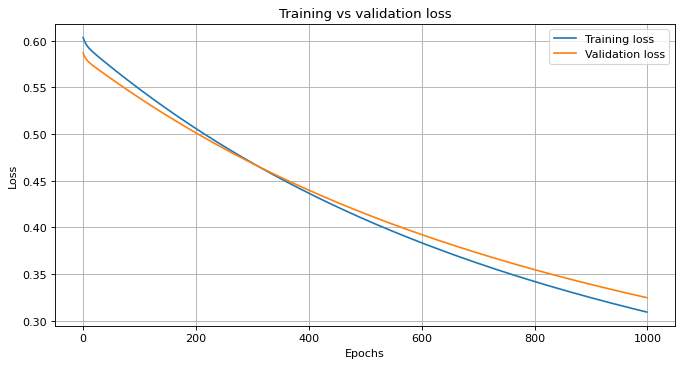

In [19]:
# An object using the LogisticRegressor class is generated. 
lr2 = LogisticRegressor()

train_x = training_set[["Sepal_Length",	"Sepal_Width"]]
train_y = training_set['target']

test_x = testing_set[["Sepal_Length",	"Sepal_Width"]]
test_y = testing_set['target']

valid_x = validation_set[["Sepal_Length",	"Sepal_Width"]]
valid_y = validation_set['target']

# The model is adjusted
training_loss, validation_loss = lr2.fit(train_x, train_y, valid_x, valid_y)

# The model training and validation loss are plotted.
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title("Training vs validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training loss','Validation loss'])
plt.grid()
plt.show()

It is very noticeable that the model takes much longer to converge with respect to the variables of the previous model.

In [20]:
# The target variable is called y
y = test_y

# The predictor variable is called yhat_2
yhat_2 = lr2.predict(test_x)
yhat_2

print_report(y,yhat_2)


|        |          | Predicted |          |
|        |          |  Positive | Negative |
| Actual | Positive |        10 |        0 |
|        | Negative |         0 |       20 |

- Precision: 1.0 
- Recall: 1.0 
- F_1 Score: 1.0 



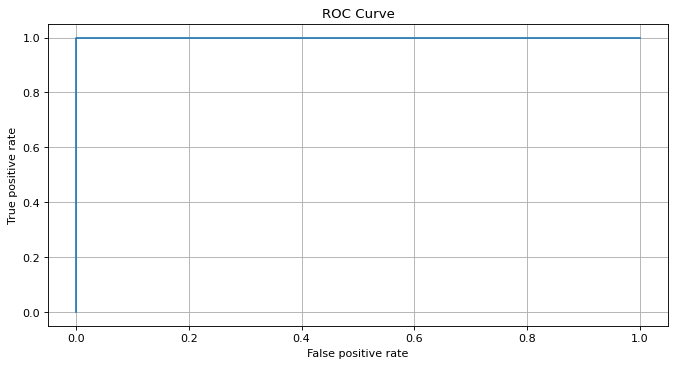

In [21]:
FP_rate, TP_rate = roc(y, lr2, test_x)

plt.figure(figsize=(10, 5), dpi=80)
plt.plot(FP_rate, TP_rate)

plt.title("ROC Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.grid()
plt.show()

The training results of both models show that for this data set when using pairs of 2 different regressor variables the same results are obtained if we compare them using the test data, in the worst case the results will be very similar regardless of the selected threshold.